# 1. Feature Engineering-- Handle Missing values Day-2

## Type 2: Random Sample Imputation
Aim: It takes random observation and replaces the NaN value

When to use ? It is assumed that Data are Missing Completely at Random

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/titanic_train.csv", usecols = ['Age', 'Fare', "Survived"])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.Age.isnull().sum()

177

In [6]:
df.Age.dropna().sample(df.Age.isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
def impute_nan(data, feature, median):
    df[feature+'_median'] = df[feature].fillna(median)
    df[feature+'_random'] = df[feature]
    ## It'll have random sample to fill the NaN
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
    ## pandas need to have same index to replace sample values generated above
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature+'_random'] = random_sample

In [19]:
median = df.Age.median()

In [21]:
impute_nan(df, 'Age', median)

<IPython.core.display.Javascript object>

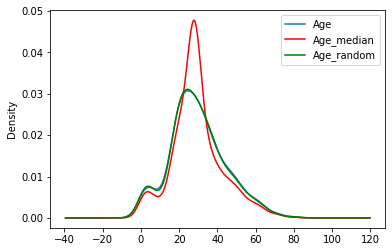

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
df['Age_random'].plot(kind = 'kde', ax = ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

## Advantages and Disadvantages of Mean/Median Imputation

### Advantages
- Easy to implement (Robust to outlier)
- This is basically a faster way to obtain a complete data
- Less Distortion in the original variance

### Disadvantages
- Randomness won't work every time
- Impacts corelation